In [64]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_excel("data/archive/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [3]:
df.shape

(898, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [5]:
pd.set_option('display.max_columns', None)

df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,0.857720,0.807190,0.003428,0.001794,0.655420,0.988680,100.165885,97.609401,96.194889,29.047436,26.383362,26.148330,0.089266,0.564139,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,0.070839,0.062175,0.020456,0.000428,0.094314,0.020473,32.126549,28.251801,21.627409,6.306931,5.462164,4.905078,0.943285,1.039813,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,0.004800,0.041100,0.001700,0.001100,0.001700,0.756800,30.382600,41.048000,44.256900,7.303800,8.655700,5.148600,-1.724200,-1.834400,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,0.827750,0.768050,0.002200,0.001500,0.589975,0.989300,76.448000,77.306125,78.502375,24.901525,22.289650,22.890975,-0.549900,-0.230200,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,0.867750,0.804950,0.002600,0.001600,0.647950,0.993600,107.682450,100.676000,99.225600,29.709450,25.638300,26.469000,-0.162700,0.243750,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,0.899500,0.848875,0.003200,0.002075,0.720625,0.996400,126.127450,119.159600,113.332250,33.274375,29.905325,29.482375,0.471025,1.406550,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,0.977300,0.968100,0.615400,0.004300,0.937300,0.999500,159.649400,166.135400,148.211400,48.571200,45.510700,42.422800,3.223600,3.697100,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [6]:
df["Class"].value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

In [27]:
labels = df["Class"]
feature_df = df.drop(columns=["Class"])
feature_df.shape

(898, 34)

<BarContainer object of 7 artists>

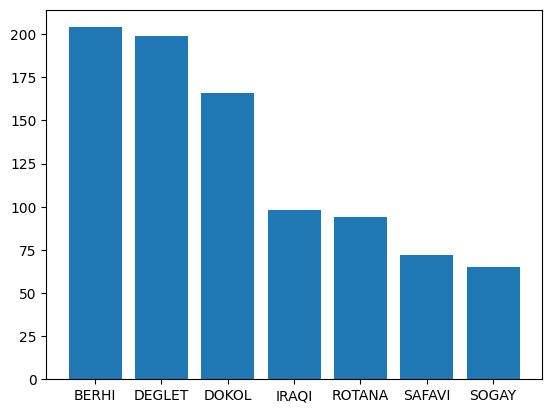

In [37]:
plt.bar(labels.unique(), labels.value_counts())

In [18]:
std_df = (feature_df - feature_df.mean()) / feature_df.std()


C:\Users\Andrei Bejan\AppData\Local\Temp\ipykernel_25024\2722130055.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


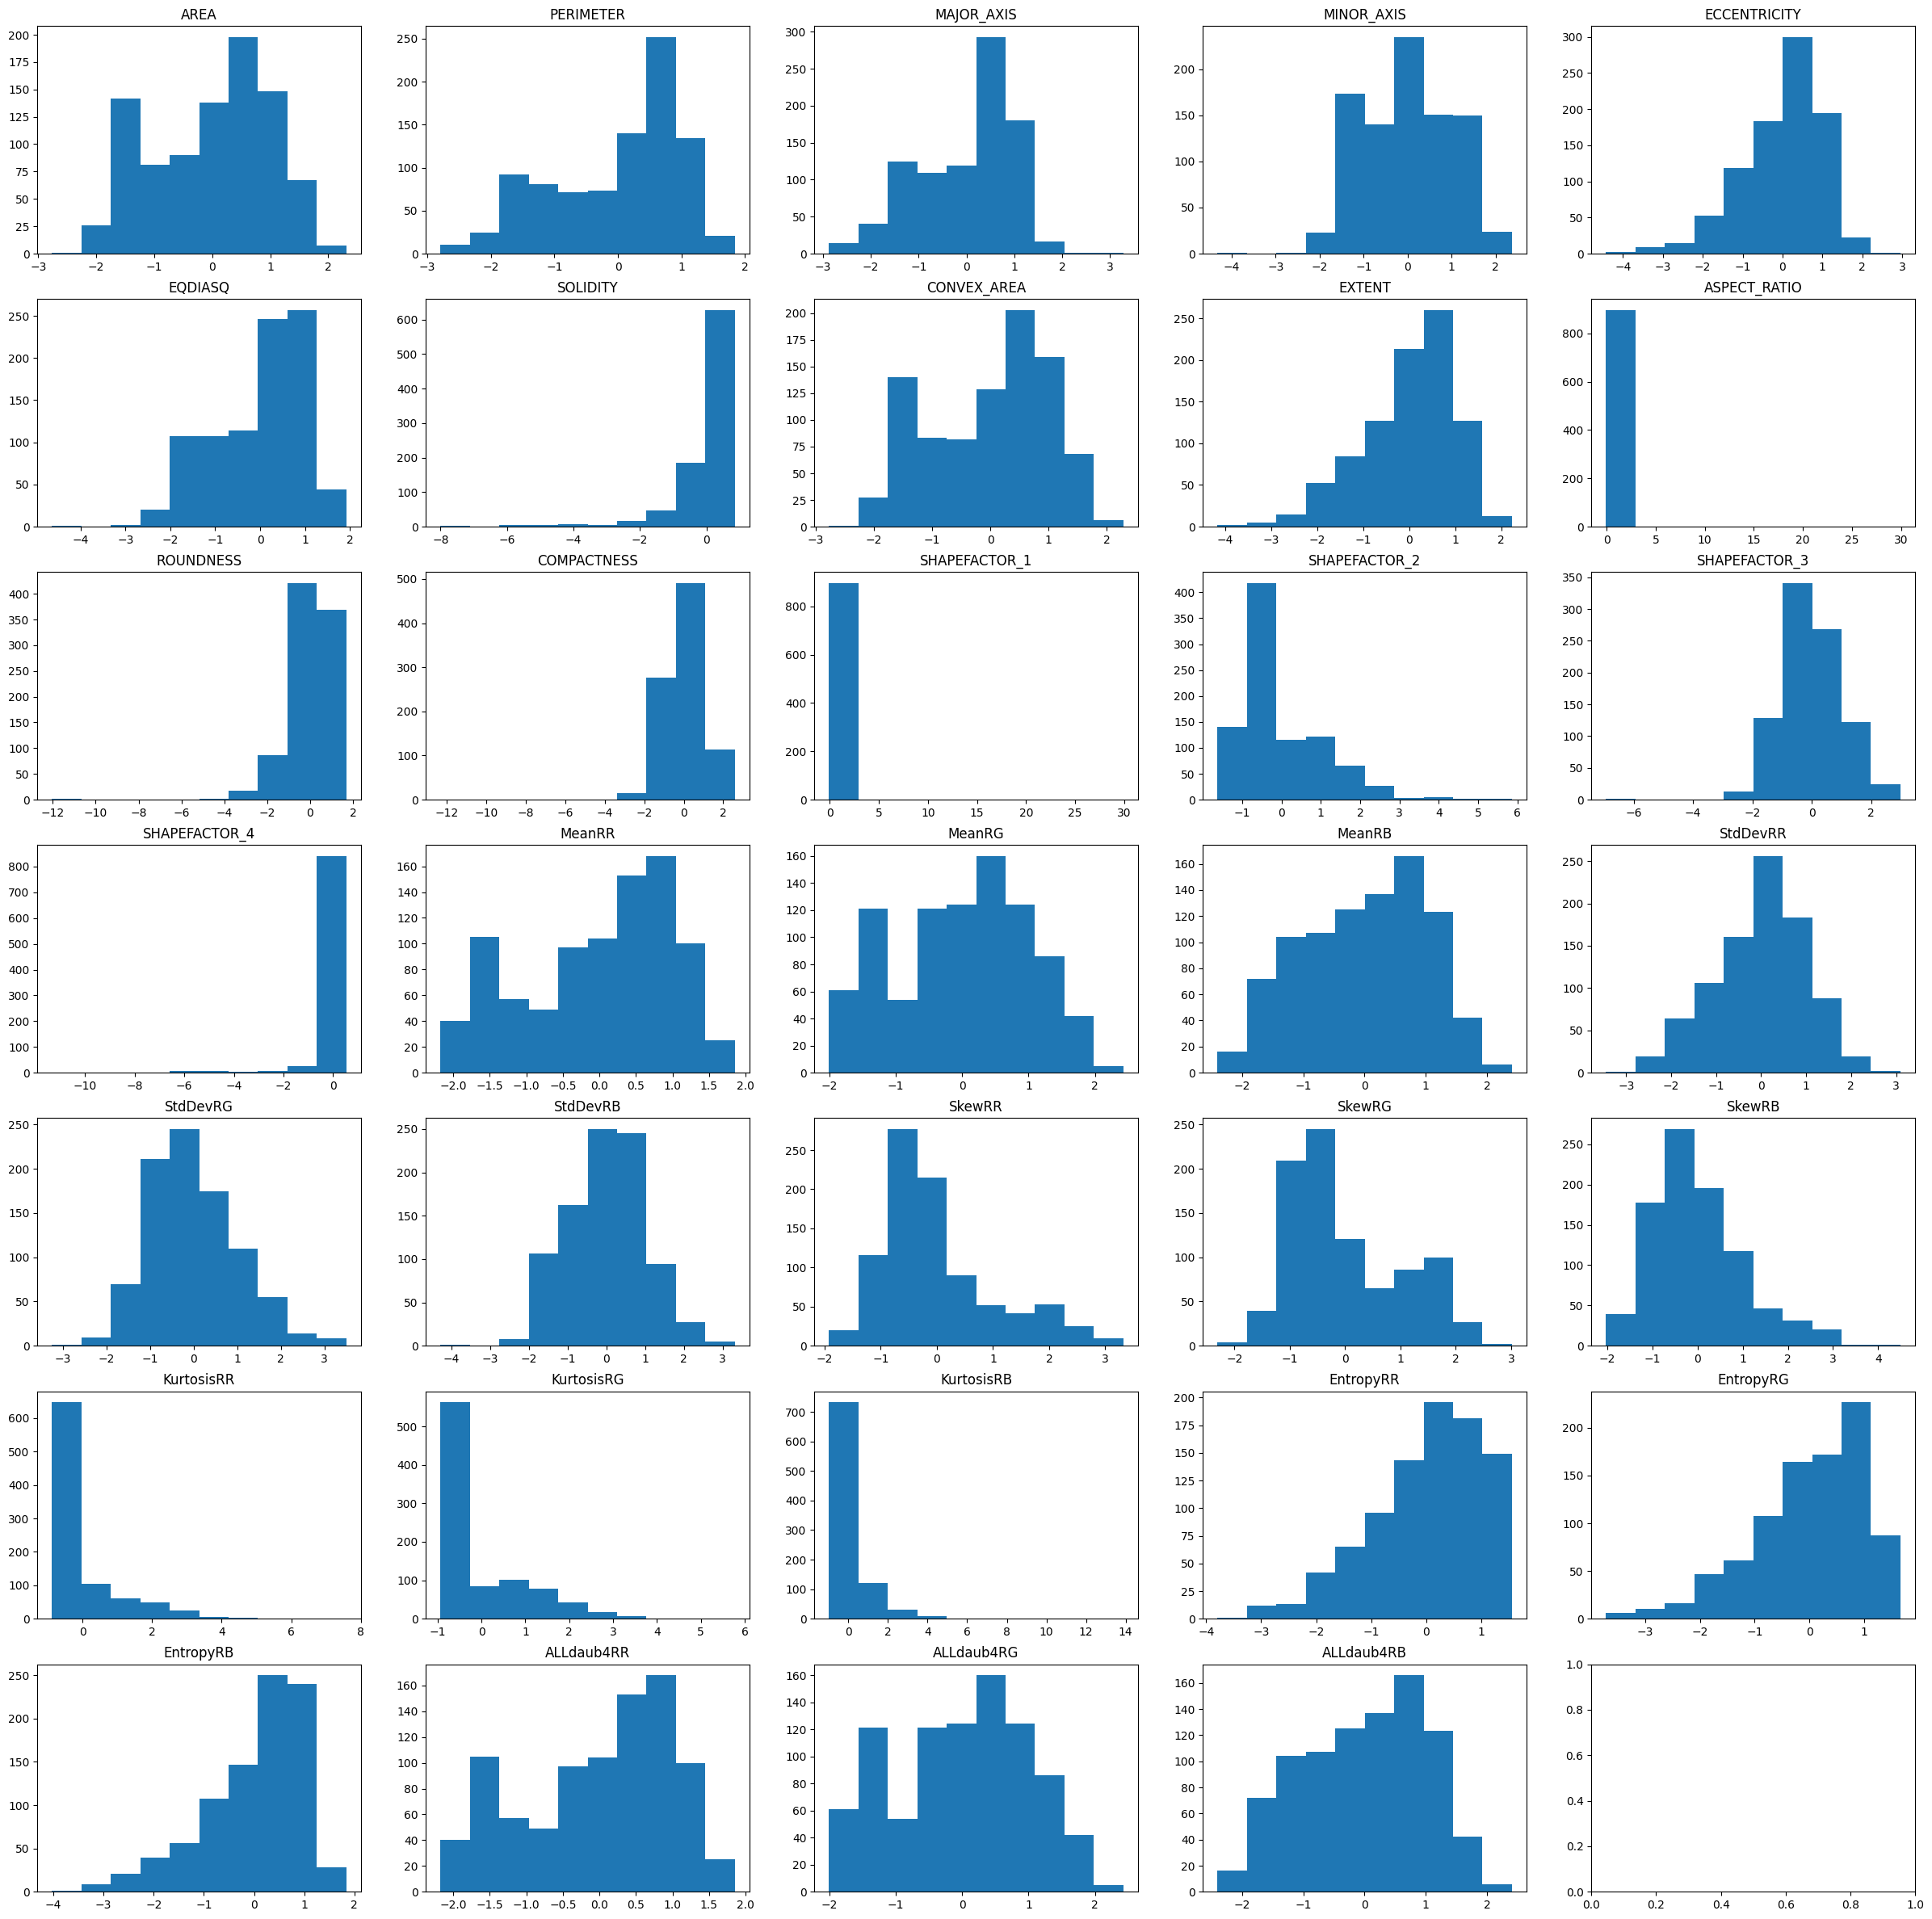

In [32]:
fig, axs = plt.subplots(7, 5, figsize=(30, 30))

for index, column in enumerate(std_df.columns):
    row = index // 5
    col = index % 5
    axs[row, col].hist(std_df[column])
    axs[row, col].set_title(column)

fig.show()

In [61]:
pca = PCA(n_components = 2)
points = pca.fit_transform(std_df)
points.shape

(898, 2)

In [65]:
tsne = TSNE(n_components = 2)
points = tsne.fit_transform(std_df)
points.shape

(898, 2)

In [66]:
colors, _ = pd.factorize(labels)

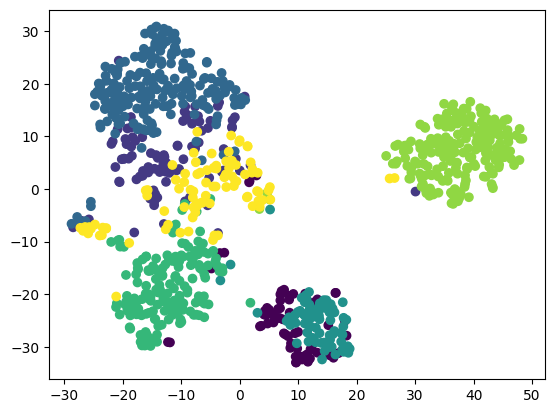

In [67]:
plt.scatter(points[:, 0], points[:, 1], c = colors)

<Axes: >

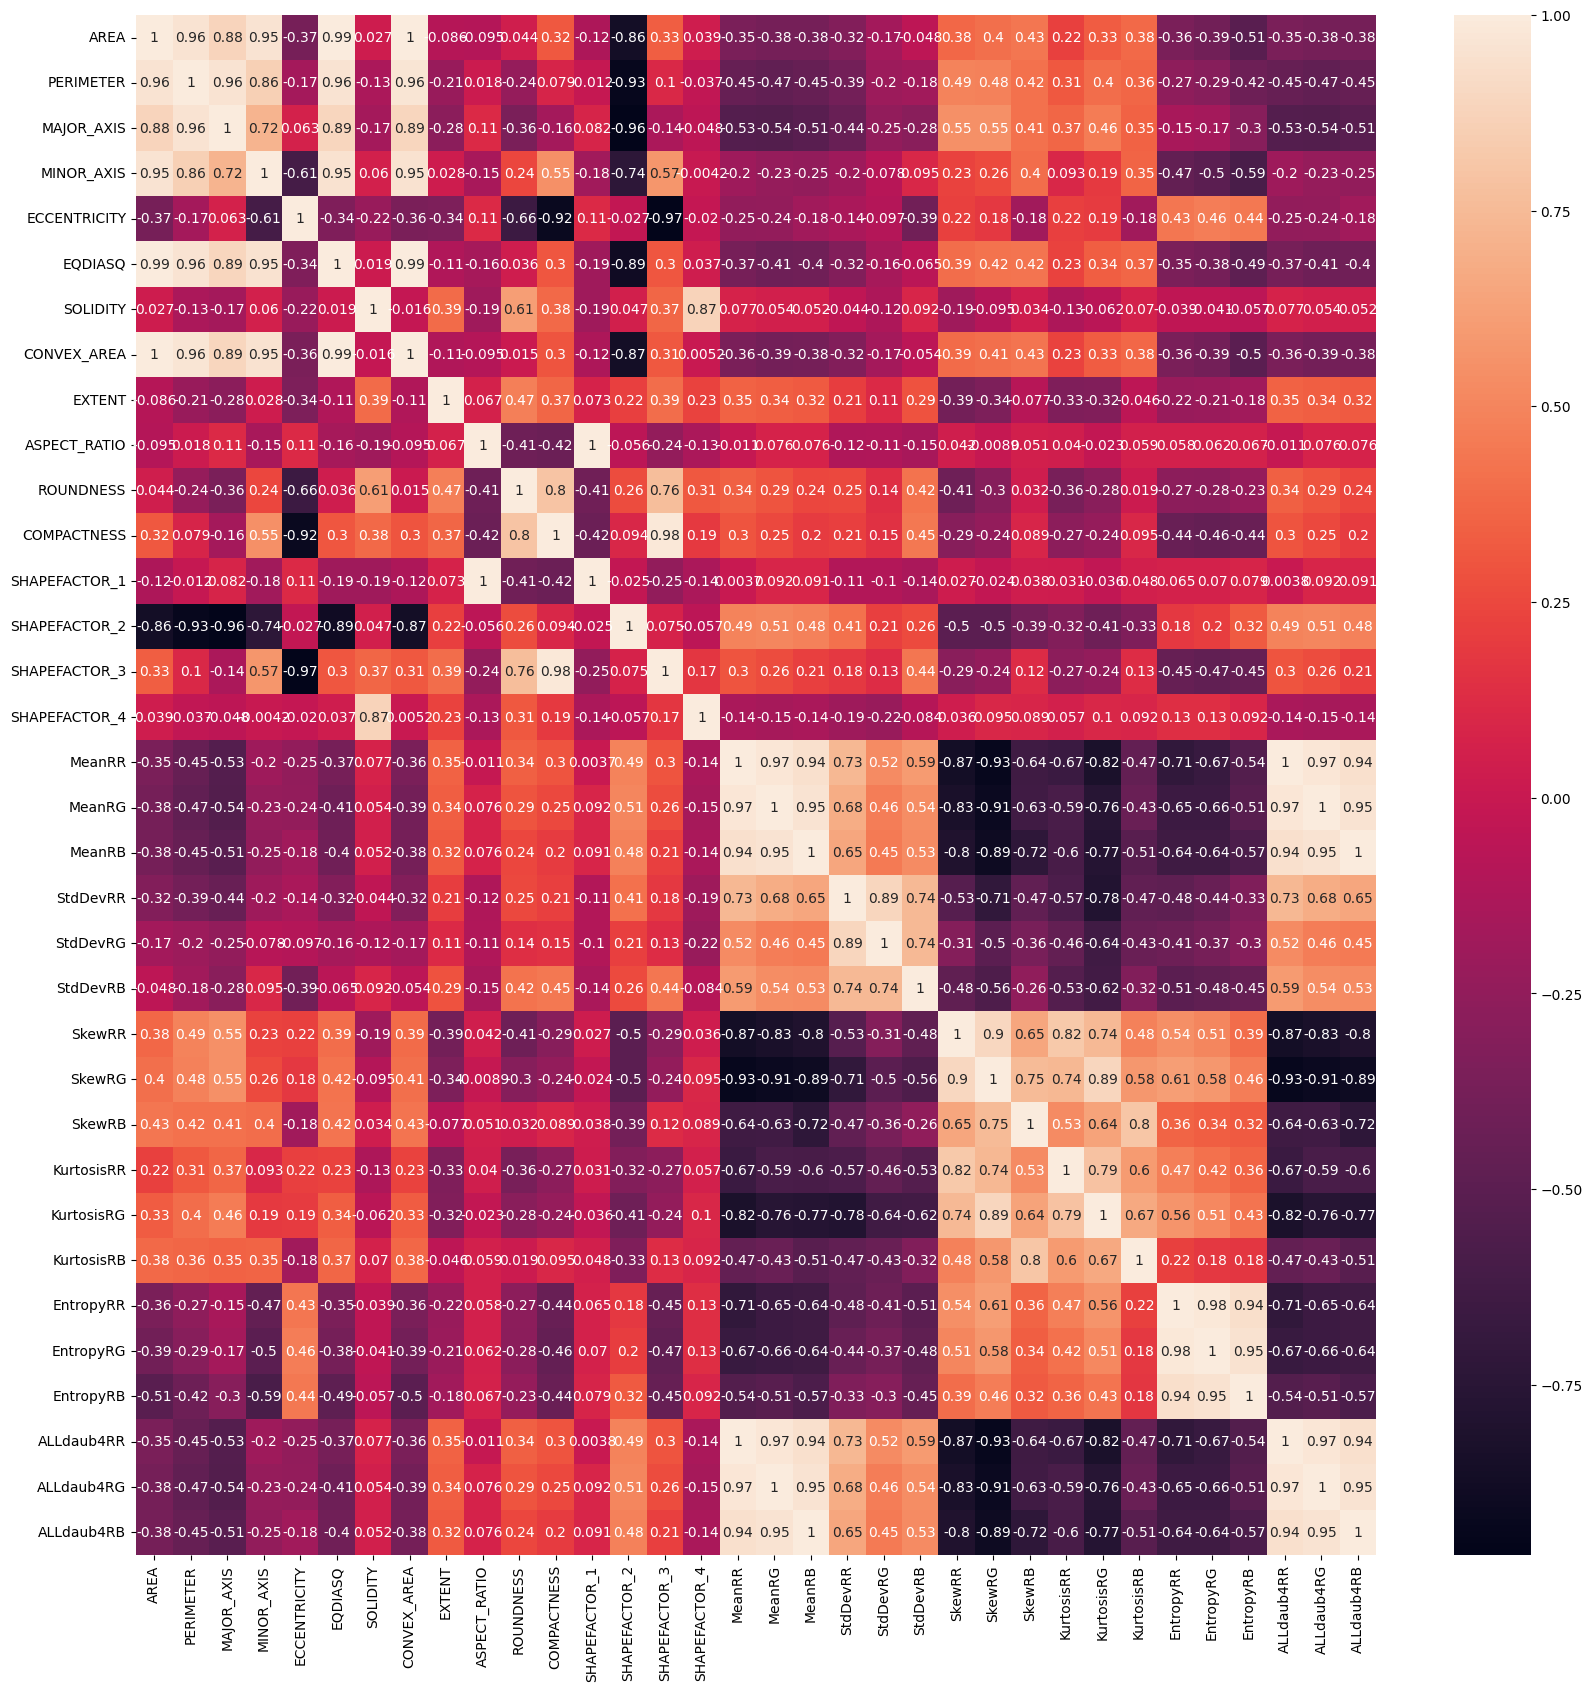

In [72]:
plt.figure(figsize=(20, 20))
sns.heatmap(feature_df.corr(), annot=True)

In [82]:
oh_encoded_labels = pd.get_dummies(labels, dtype=int)
oh_encoded_labels

,BERHI,DEGLET,DOKOL,IRAQI,ROTANA,SAFAVI,SOGAY
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
893,0,0,0,0,0,0,1
894,0,0,0,0,0,0,1
895,0,0,0,0,0,0,1
896,0,0,0,0,0,0,1
